In [1]:
import os
import re
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf

2024-07-03 21:41:06.075853: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-03 21:41:06.087453: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-03 21:41:06.170927: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-03 21:41:06.270678: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 21:41:06.370005: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [2]:
# Path to the image directory
image_dir = 'Results/Floating window'

In [3]:
# Function to extract the number of persons from the filename
def extract_label(filename):
    match = re.search(r'=(\d+)', filename)
    if match:
        return int(match.group(1))
    else:
        return None

In [4]:
# Load images and labels
images = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        label = extract_label(filename)
        if label is not None:
            img_path = os.path.join(image_dir, filename)
            img = Image.open(img_path).convert('RGB')
            images.append(np.array(img))
            labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [5]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=12)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=12)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (723, 128, 1280, 3), (723,)
Validation set: (241, 128, 1280, 3), (241,)
Test set: (241, 128, 1280, 3), (241,)


In [6]:
# Function to resize and normalize images
def preprocess_images(images, size=(1280, 128)):
    images_resized = []
    for img in images:
        img_resized = Image.fromarray(img).resize(size)
        img_normalized = np.array(img_resized) / 255.0
        images_resized.append(img_normalized)
    return np.array(images_resized)

In [7]:
# Preprocess the datasets
X_train = preprocess_images(X_train)
X_val = preprocess_images(X_val)
X_test = preprocess_images(X_test)

# Display the new dimensions of the datasets
print(f"Preprocessed Training set: {X_train.shape}")
print(f"Preprocessed Validation set: {X_val.shape}")
print(f"Preprocessed Test set: {X_test.shape}")

Preprocessed Training set: (723, 128, 1280, 3)
Preprocessed Validation set: (241, 128, 1280, 3)
Preprocessed Test set: (241, 128, 1280, 3)


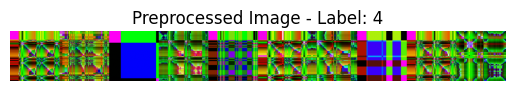

In [12]:
import matplotlib.pyplot as plt

# Display one preprocessed image from the training set
plt.imshow(X_train[70])
plt.title(f'Preprocessed Image - Label: {y_train[70]}')
plt.axis('off')
plt.show()